<a href="https://colab.research.google.com/github/satvik-dixit/speech_emotion_recognition/blob/main/glottal_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
! pip install -q disvoice

In [ ]:
# import audio file

from google.colab import files
files.upload()

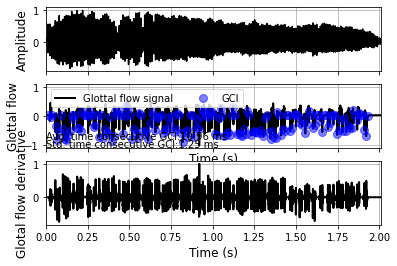

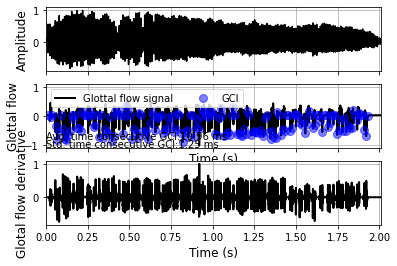

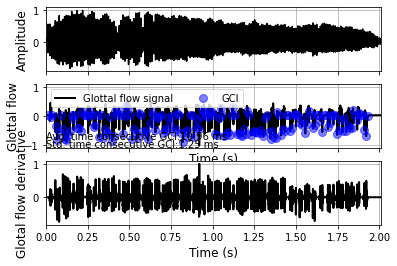

In [20]:
# test feature extraction and plotting on the audio file

from disvoice.glottal import Glottal
glottal=Glottal()
file_audio="audios_001_a1_PCGITA.wav"

KALDI_ROOT= '/content/audios_001_a1_PCGITA.wav'

features=glottal.extract_features_file(file_audio, plots=True, fmt="numpy")
features2=glottal.extract_features_file(file_audio, plots=True, fmt="dataframe")
features3=glottal.extract_features_file(file_audio, plots=True, fmt="torch")


In [21]:
# test feature extraction without plotting on the audio file

features=glottal.extract_features_file(file_audio, plots=False, fmt="numpy")
features2=glottal.extract_features_file(file_audio, plots=False, fmt="dataframe")
features3=glottal.extract_features_file(file_audio, plots=False, fmt="torch")

In [22]:
# numpy
print(features)
# pandas
print(features2)
# pytorch
print(features3)

None
   global avg var GCI  global avg avg NAQ  global avg std NAQ  \
0             0.00105            0.004712            0.002313   

   global avg avg QOQ  global avg std QOQ  global avg avg H1H2  \
0            0.483623            0.248369            18.348063   

   global avg std H1H2  global avg avg HRF  global avg std HRF  \
0            12.408972           56.071515          195.619758   

   global std var GCI  ...  global skewness std HRF  global kurtosis var GCI  \
0            0.000279  ...                  2.12825                12.084682   

   global kurtosis avg NAQ  global kurtosis std NAQ  global kurtosis avg QOQ  \
0                -0.206489                -0.599053                 0.047036   

   global kurtosis std QOQ  global kurtosis avg H1H2  \
0                -0.265706                 -0.494493   

   global kurtosis std H1H2  global kurtosis avg HRF  global kurtosis std HRF  
0                  1.435911                 2.482253                 4.523566  

[1

In [ ]:
# Extracting glottal features for EmoDB dataset

In [24]:
import os
import numpy as np
from glob import glob

import torch

import warnings
warnings.filterwarnings('ignore')

In [25]:
! pip install -q kaggle

from google.colab import files
files.upload()

# Name directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [28]:
# Load dataset
! kaggle datasets download -q -d piyushagni5/berlin-database-of-emotional-speech-emodb
! unzip -q berlin-database-of-emotional-speech-emodb.zip

# Extracting features
audio_files = glob('/content/wav/*.wav')


replace wav/03a01Fa.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [29]:
# first 10 audio files of EmoDB

features_list = []
for audio in audio_files[:10]:
  features = glottal.extract_features_file(audio, plots=False, fmt="torch")
  features_list.append(features)

dataset_glottal_features = torch.stack(features_list)

In [30]:
print(dataset_glottal_features)

tensor([[[ 4.9249e-03,  2.0614e-02,  6.8085e-03,  4.9892e-01,  3.1012e-01,
           1.0095e+01,  8.3026e+00, -6.3541e+01,  3.3305e+03,  7.8289e-03,
           3.9884e-03,  1.9343e-03,  1.4507e-01,  5.1348e-01,  3.1545e+00,
           1.8747e+00,  1.5551e+03,  6.8135e+03,  1.3960e+00, -1.9974e-01,
           4.7997e-01,  2.1621e+00,  2.6215e+00,  4.4671e-02, -6.0808e-01,
          -3.4818e+00,  5.2952e+00,  6.1254e-01, -4.4634e-01,  4.6670e-01,
           4.8120e+00,  6.3468e+00,  3.4355e-01,  7.8885e-01,  1.4829e+01,
           3.1501e+01]],

        [[ 3.9648e-03,  1.4253e-02,  4.4949e-03,  4.6819e-01,  2.9024e-01,
           1.0650e+01,  6.7831e+00, -6.4550e+02,  5.5021e+03,  1.1840e-02,
           5.6596e-03,  1.5260e-03,  2.1354e-01,  5.1466e-01,  3.0682e+00,
           3.3737e+00,  3.8400e+03,  1.5114e+04,  4.6492e+00, -1.6568e-01,
           2.4094e-01,  1.4255e+00,  2.9731e+00, -1.0619e+00,  5.6067e-02,
          -3.9567e+00,  3.4975e+00,  2.2917e+01,  1.7463e-01, -8.2075e-01,